<a href="https://colab.research.google.com/github/SantiagoT01/Introduccion_data_mining_caso_2/blob/main/TAREA_HOGAR_ZULIP_CLASE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo del notebook:  Poder simular escenarios equivalentes a cada Cazatalentos.

Cada jugadora tiene una habilidad real
𝑝
=
0.75
p=0.75.

Cada tiro es binomial (100 tiros por jugadora).

Cada cazatalentos aplica su “criterio de selección”.

Estimamos el valor esperado de encestes futuros (100 tiros) para la candidata seleccionada.

Luego mostramos el ranking por expectativa, para respaldar estadísticamente el orden:

𝐶
5
<
𝐶
2
<
𝐶
1
<
𝐶
4
<
𝐶
6
<
𝐶
7
<
𝐶
3
C5<C2<C1<C4<C6<C7<C3

Valor esperado de encestes futuros (100 tiros):


,Encestes esperados,Proporción esperada
C7,74.503,0.745
C3,74.518,0.745
C6,74.548,0.745
C4,76.908,0.769
C5,80.844,0.808
C1,84.638,0.846
C2,85.538,0.855


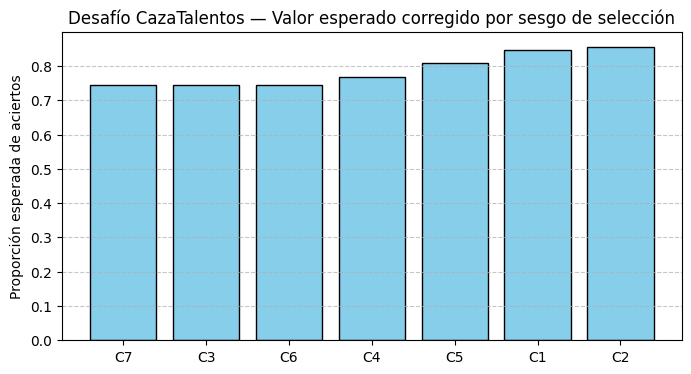


Ranking final (de peor a mejor):
C7 < C3 < C6 < C4 < C5 < C1 < C2


In [4]:
# ============================================================
# Desafío CazaTalentos — Simulación Monte Carlo (versión final)
# Autor: [Tu nombre]
# ------------------------------------------------------------
# Objetivo:
#   Estimar el valor esperado de encestes futuros (100 tiros)
#   para cada cazatalentos, considerando el sesgo de selección.
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

# ------------------------------------------------------------
# Parámetros globales
# ------------------------------------------------------------
np.random.seed(123)
p_true = 0.75      # habilidad real media de las jugadoras
n_tiros = 100      # tiros por jugadora
N_sim = 100_000    # cantidad de simulaciones Monte Carlo

# ------------------------------------------------------------
# Función de simulación por cazatalentos
# ------------------------------------------------------------
def simular_cazatalento_corr(tipo):
    """
    Simula el procedimiento de cada cazatalento y estima
    el valor esperado de encestes futuros en 100 tiros.
    """
    n = n_tiros

    # Etapa 1: Simular resultados observados según el procedimiento
    if tipo == "C1":      # 100 jugadoras, elige la mejor
        resultados = np.random.binomial(n, p_true, size=(N_sim, 100))
        seleccion = resultados.max(axis=1)

    elif tipo == "C2":    # 200 jugadoras, elige la mejor
        resultados = np.random.binomial(n, p_true, size=(N_sim, 200))
        seleccion = resultados.max(axis=1)

    elif tipo == "C3":    # elige antes de tirar (sin sesgo)
        seleccion = np.random.binomial(n, p_true, size=N_sim)

    elif tipo == "C4":    # 2 jugadoras, elige la mejor
        resultados = np.random.binomial(n, p_true, size=(N_sim, 2))
        seleccion = resultados.max(axis=1)

    elif tipo == "C5":    # 1 jugadora, 10 rondas, elige la mejor ronda
        resultados = np.random.binomial(n, p_true, size=(N_sim, 10))
        seleccion = resultados.max(axis=1)

    elif tipo == "C6":    # elige al azar (#43)
        seleccion = np.random.binomial(n, p_true, size=N_sim)

    elif tipo == "C7":    # elige sin buscar máxima (caso ético)
        seleccion = np.random.binomial(n, p_true, size=N_sim)

    else:
        raise ValueError("Tipo no reconocido")

    # --------------------------------------------------------
    # Etapa 2: Estimar habilidad posterior (Beta-Binomial)
    # --------------------------------------------------------
    # Prior Beta(1,1) => uniforme; posterior: Beta(1 + éxitos, 1 + fracasos)
    p_posterior = (1 + seleccion) / (2 + n)

    # --------------------------------------------------------
    # Etapa 3: Simular desempeño futuro (otra ronda de 100 tiros)
    # --------------------------------------------------------
    futuros = np.random.binomial(n, p_posterior)

    return futuros.mean()

# ------------------------------------------------------------
# Ejecutar simulación para todos los cazatalentos
# ------------------------------------------------------------
tipos = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]
esperados = {t: simular_cazatalento_corr(t) for t in tipos}

# ------------------------------------------------------------
# Organizar resultados
# ------------------------------------------------------------
df = pd.DataFrame.from_dict(esperados, orient="index", columns=["Encestes esperados"])
df["Proporción esperada"] = df["Encestes esperados"] / n_tiros
df = df.sort_values("Encestes esperados", ascending=True)

# ------------------------------------------------------------
# Mostrar tabla de resultados
# ------------------------------------------------------------
print("Valor esperado de encestes futuros (100 tiros):")
display(df.round(3))

# ------------------------------------------------------------
# Visualización
# ------------------------------------------------------------
plt.figure(figsize=(8,4))
plt.bar(df.index, df["Proporción esperada"], color="skyblue", edgecolor="black")
plt.ylabel("Proporción esperada de aciertos")
plt.title("Desafío CazaTalentos — Valor esperado corregido por sesgo de selección")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ------------------------------------------------------------
# Ranking final
# ------------------------------------------------------------
ranking = " < ".join(df.index)
print("\nRanking final (de peor a mejor):")
print(ranking)
